# CIA World Factbook (2015)
This project is for Dataquest's In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

- population - The population as of 2015.
- population_growth - The annual population growth rate, as a percentage.
- area - The total land and water area.

In [7]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
query = "SELECT * FROM sqlite_master WHERE type='table';"
cursor.execute(query).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [6]:
pd.read_sql_query(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [8]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Looking for Outliers
Let's explore countries with the least and most population.

In [15]:
q = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [16]:
q = "SELECT * from facts WHERE population == (SELECT MAX(population) FROM facts);"

pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


In [17]:
q = "SELECT * from facts WHERE population == (SELECT MIN(population) FROM facts);"

pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


### Findings
The outliers are quite obvious: 1) Antartica is practically inhabitable, and well 2) The world includes everyone in existance. We can exclude them from here on.

## Histograms
Let's practice with making some histograms looking at the population, population growth, birth rate, and death rate.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


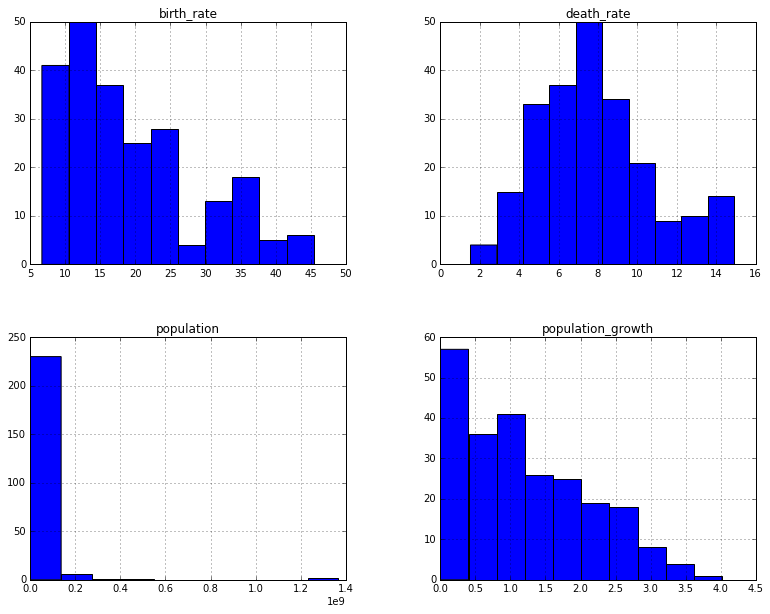

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

q6 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != (SELECT MAX(population) FROM facts) AND population != (SELECT MIN(population) FROM facts);"

fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(2,2,1)
pd.read_sql_query(q6, conn).hist(ax=ax)
plt.show()

## Countries With The Highest Population Density
Let's find out the countries with the highest population density i.e. the highest proportion of people per square feet.

In [24]:
q = "SELECT name, population,area,CAST(population AS FLOAT)/cast(area as float) density from facts order by density desc limit 20"
pd.read_sql_query(q, conn)

,name,population,area,density
0,Macau,592731,28,21168.964286
1,Monaco,30535,2,15267.500000
2,Singapore,5674472,697,8141.279770
3,Hong Kong,7141106,1108,6445.041516
4,Gaza Strip,1869055,360,5191.819444
5,Gibraltar,29258,6,4876.333333
6,Bahrain,1346613,760,1771.859211
7,Maldives,393253,298,1319.640940
8,Malta,413965,316,1310.015823
9,Bermuda,70196,54,1299.925926
